<a href="https://colab.research.google.com/github/Lasttrader/LT_finance_and_trading/blob/master/09_04_2023_fintech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fintech plan

In [ ]:
'''
План:
1. +Разработка коннектор Bybit с записью в БД

2. Разработка отрисовка графиков
+bb
+candles
-external candles

3. Отрисовка индикаторов
+high low
+bb
-external chart

4. Разработка алгоритма BB
5. +Получение high and low, фракталов
6. +Разработка открытия закрытия стоп и Тейк
7. Разработка метода учёта сделок
8. Тестирование алгоритма BB
'''

'\nПлан:\n1. +Разработка коннектор Bybit с записью в БД\n\n2. Разработка отрисовка графиков\n+bb\n+candles\n-external candles\n\n3. Отрисовка индикаторов\n+high low\n+bb\n-external chart\n\n4. Разработка алгоритма BB\n5. +Получение high and low, фракталов\n6. Разработка открытия закрытия стоп и Тейк\n7. Тестирование алгоритма BB\n'

#Import

In [1]:
!pip install pybit
!pip install qgrid

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 11.3 MB/s eta 0:00:00
  Created wheel for pybit: filename=pybit-5.2.0-py2.py3-none-any.whl size=48357 sha256=b0f551e3cad7463d5781f0fcfc5e993342948bcbe29cb6863de5f4f91463d71d
  Stored in directory: /root/.cache/pip/wheels/28/56/f3/a0a2506e41f7e37d23d59a72ddeb4079ae834ba332d734eb07
Successfully built pybit
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 889.2/889.2 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 47.9 MB/s eta 0:00:00
  Created wheel for qgrid: filename=qgrid-1.3.1-py2.py3-none-any.whl size=1761270 sha256=106d0e476011067f5e40ceea6c

In [2]:

#bybit
import requests 
import json 
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import qgrid
import time

#plotly
import plotly.graph_objects as go

print('hello! imports finished success')

#Sources

In [ ]:
'''
Class connectors
Тип коннектора
-тинькоф
-сб РФ
-фридом
-райф
-bybit
-bingx
-БД postgresql
-БД mongodb
-БД clickhouse
-tradingview

Токен: 
Адрес:
БД
Логин
Пароль
'''

In [ ]:
class Sources:
  pass
  
  class Tinkoff:
    pass

  class Sber:
    pass

  class Freedom:
    pass
  
  class Raif:
    pass

  class Bybit:
    pass

  class BingX:
    pass
 
  class Postgresql:
    pass

  class MongoDB:
    pass

  class Clickhouse:    
    pass    

  class Tradingview:    
    pass

In [ ]:
'''
import math
class circle():
    def __init__(self,radius):
        self.radius=radius
    def area(self):
        return math.pi*(self.radius**2)
    def perimeter(self):
        return 2*math.pi*self.radius
 
r=int(input("Enter radius of circle: "))
obj=circle(r)
print("Area of circle:",round(obj.area(),2))
print("Perimeter of circle:",round(obj.perimeter(),2))
'''

'\nimport math\nclass circle():\n    def __init__(self,radius):\n        self.radius=radius\n    def area(self):\n        return math.pi*(self.radius**2)\n    def perimeter(self):\n        return 2*math.pi*self.radius\n \nr=int(input("Enter radius of circle: "))\nobj=circle(r)\nprint("Area of circle:",round(obj.area(),2))\nprint("Perimeter of circle:",round(obj.perimeter(),2))\n'

#ETL

In [ ]:
'''
Class ETL

Тип etl
-sql
-python
'''

class ETL:
  pass

#Connectors

In [4]:
'''Class Источники
Получить коннектор
Def Получить котировку
Def Получить тиковые данные
Market_replay'''

class connectors:
  def getConnector():
    return


#Visualization

In [ ]:
'''Class График
Нарисовать
Сохранить'''

In [ ]:
'''Class Индекаторы 
Горизонтальный объём
Индикатор внешнего таймфрейма
Болшинджер бэндс'''

#Indicators

#Patterns

#Trading and orders (Auto)


#Money management

#Notifications

#Testing

#Machine learning

In [ ]:
'''Class анализ паттернов
Class tech indicators
Проверить при входе
Значение индикаторов в момент сделки
Class управление капиталом
Расчитать размер позиции
Class торговля
Ордер
Тейк
Стоп
Class уведомления
Class машинного обучения
Class screener'''

In [ ]:
'''Get_chart()
Объем повышение
Выставить ордер на минимум
Тейк 1 и 2 до объёма
Ордер на углы по объему V и А 4 часа
Получить график
Разбить на неделю
На день
На 4 часа
Определитт тренд и флэт по объему POC
проанализировать прошлую неделю на:
Углы по 4 часа
На фикспрефикс
На объём прошлой недели 
оценить объём по статистике
выставка ордера
Выставка стопа
Вы вставки Тейк на Макс
Выставка Тейк на х2
Скриншот
Пубшикации
Сопровождения
Скриншоты
Публикация
Статистика
Тренажёр
Подписка
Алгоритмы в торговле
Фикс префикс
 - Вход от фикса
тестирование  обьемного уровня
 - Вход на отскок
Тестирование Макс дельты внешней свечи
 - Вход от последнего уровня
 - Вход через 1 уровень
Зоны продавцов и покупателей
 - Треугольник выход вход на тесте
Торговля по тренду'''

In [ ]:
'''Get-graph 
Получаем график данные
 1. Получение графика и данных
 2. Проверка  времени понедельник 0000
 3.  получение данных недели ohlc
 4. Сравнение с предыдущей неделей
 5. Тип недели тренд, расширение, внутренняя
 6. Проверка BB получение уровней
 7. проверка H4 get dodgi и получение данных +/- 3 бара
 8. Проверка объёмов и дельты получение данных
 9. Проверка внутренней структуры недели где закрытие
 -если внутри то ФПФ
 -если снаружи то тест
 Входы
 Ohlc меньше ohlc - 1
  от ББ
  от уровня боли + зеркала (проверить виделали цена в прошлом)
  от доджи
 через 1 уровень  объема'''

#Workshop

In [7]:
#bybit
# опрделяем функцию, которая будет получать данные и возвращать нам датафрейм pandas
# в качестве аргументов передаём
'''
symbol - тикет криптовалюты, данные по которой хотим получить
interval - интервал, таймфрейм (час, день, неделя и т.д.)

\startTime - время начала 
endTime - конечное время
'''
def get_bybit_bars(symbol, interval, startTime, endTime): 
    
    #пигем адрес, где получаем данные
    url = "https://api.bybit.com/v2/public/kline/list"
    #определяем начало времени
    startTime = str(int(startTime.timestamp()))
    #определяем конечное время
    endTime   = str(int(endTime.timestamp()))
    #определяем параметры аргументов
    req_params = {"symbol" : symbol, 'interval' : interval, 'from' : startTime, 'to' : endTime}
    #создаем pandas датафрейм
    df = pd.DataFrame(json.loads(requests.get(url, params = req_params).text)['result'])
    if (len(df.index) == 0):
        return None
    #в качесвте индекса датафрейма будем использовать временную метку
    df.index = [dt.datetime.fromtimestamp(x) for x in df.open_time]
    # возвращаем датафрейм
    return df

#создаем датафрейм и спользуем функцию get_bybit_bars, которую создали
data = get_bybit_bars('ETHUSD', 240, dt.datetime(2023, 3, 10), dt.datetime(2023, 4, 10))

'''
проходим циклом по каждой колонке нашей таблицы
пробуем преобразовать данные в тип "число с плавающей точкой", 
т.к. по умолчанию может приходит тип object
'''
for i in data.columns:
  try:
    data[i]=data[i].astype('float')
  except:
    print(f'error {i}')
print(data.info())
#выводим первые 5 строк нашей таблицы
data.head()

error symbol
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 200 entries, 2023-03-10 00:00:00 to 2023-04-12 04:00:00
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   symbol     200 non-null    object 
 1   interval   200 non-null    float64
 2   open_time  200 non-null    float64
 3   open       200 non-null    float64
 4   high       200 non-null    float64
 5   low        200 non-null    float64
 6   close      200 non-null    float64
 7   volume     200 non-null    float64
 8   turnover   200 non-null    float64
dtypes: float64(8), object(1)
memory usage: 15.6+ KB
None


,symbol,interval,open_time,open,high,low,close,volume,turnover
2023-03-10 00:00:00,ETHUSD,240.0,1.678406e+09,1436.60,1436.60,1408.60,1425.40,41986513.0,29518.245585
2023-03-10 04:00:00,ETHUSD,240.0,1.678421e+09,1425.40,1425.60,1389.35,1410.75,64666761.0,45930.183768
2023-03-10 08:00:00,ETHUSD,240.0,1.678435e+09,1410.75,1411.85,1367.15,1384.20,69742314.0,50357.105897
2023-03-10 12:00:00,ETHUSD,240.0,1.678450e+09,1384.20,1433.75,1379.80,1416.75,139275786.0,99195.649456
2023-03-10 16:00:00,ETHUSD,240.0,1.678464e+09,1416.75,1438.50,1400.05,1423.05,55178392.0,38973.772304


[nan, nan, nan, nan, 1438.5, nan, 1489.8, nan, nan, nan, nan, 1488.0, nan, 1482.4, nan, nan, nan, nan, 1635.3, nan, nan, 1704.55, nan, nan, nan, 1701.95, nan, 1786.9, nan, nan, nan, nan, nan, nan, nan, 1670.45, nan, nan, 1674.95, nan, 1696.2, nan, nan, nan, 1767.65, nan, nan, nan, 1836.7, nan, nan, 1847.05, nan, nan, nan, nan, nan, nan, 1846.7, nan, nan, nan, 1808.5, nan, nan, nan, nan, nan, nan, 1840.25, nan, nan, nan, 1813.0, nan, 1823.55, nan, nan, nan, nan, nan, 1863.25, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1764.95, nan, nan, 1758.05, nan, nan, 1802.95, nan, 1784.4, nan, nan, 1770.75, nan, nan, nan, nan, nan, 1754.2, nan, 1796.55, nan, nan, nan, 1828.75, nan, nan, nan, 1830.15, nan, nan, nan, nan, nan, 1817.8, nan, nan, 1847.1, nan, nan, 1842.9, nan, nan, nan, nan, 1825.9, nan, 1824.95, nan, nan, nan, nan, nan, nan, nan, nan, 1839.9, nan, nan, nan, nan, 1892.5, nan, nan, 1926.55, nan, nan, 1943.35, nan, nan, nan, nan, nan, nan, 1882.0, nan, 1882.75, nan, nan, 1863

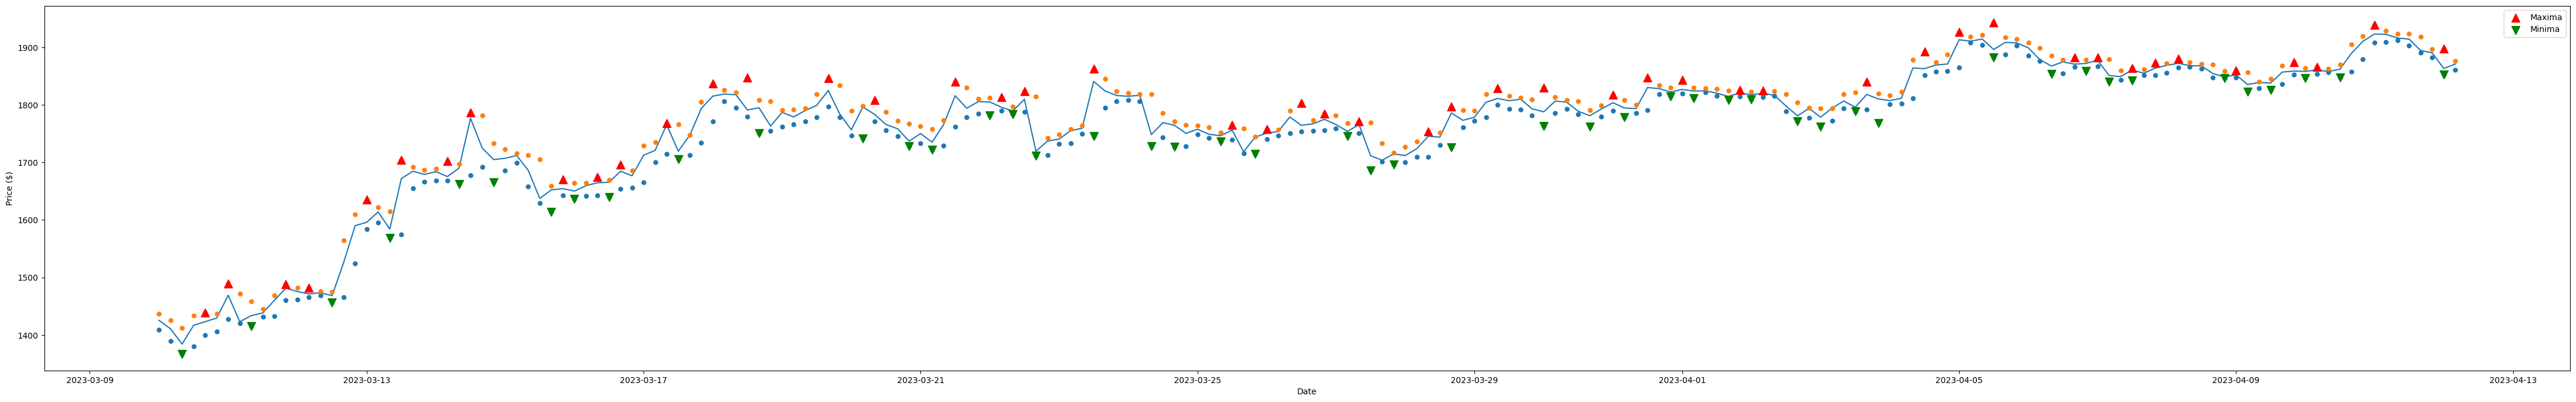

In [8]:

#local max close
data['local_max'] = data['high'][
  (data['high'].shift(1) < data['high']) &
  (data['high'].shift(-1) < data['high'])]

#local min close
data['local_min'] = data['low'][
  (data['low'].shift(1) > data['low']) &
  (data['low'].shift(-1) > data['low'])]

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

print(list(data['local_max']))
#plot
plt.figure(figsize=(55, 8))
plt.plot(data['close'], zorder=0)
plt.scatter(data.index, data['low'], s=25)
plt.scatter(data.index, data['high'],s=25)
plt.scatter(data.index, data['local_max'], s=100,
  label='Maxima', marker='^', c='r')
plt.scatter(data.index, data['local_min'], s=100,
  label='Minima', marker='v', c='g')
plt.xlabel('Date')
plt.ylabel('Price ($)')
#plt.title(f'Local Maxima and Minima for {ticker}')
plt.legend()
plt.show()

In [ ]:
'''#algo BB
Торговля верхней
Да/нет
Лонг/шорт/оба

Торговля средней

Торговля нижней

Период 1
Настройка

Период 2

Период 3

Лонг:
От Лоя бб
От хая бб

Шорт
От Лоя бб
От хая бб'''

In [10]:
#filters by day_week, to find any day
filter_day = 'D'
day_of_week = 0
days_week = pd.date_range(data.index[0], data.index[-1], freq=filter_day).to_series().dt.dayofweek
days_week[days_week == day_of_week ].index

DatetimeIndex(['2023-03-13', '2023-03-20', '2023-03-27', '2023-04-03',
               '2023-04-10'],
              dtype='datetime64[ns]', freq=None)

In [11]:
# Define the parameters for the Bollinger Band calculation
ma_size = 21
bol_size = 2
# Calculate the SMA
data.insert(0, 'moving_average', data['close'].rolling(ma_size).mean())
# Calculate the upper and lower Bollinger Bands
data.insert(0, 'bol_upper', data['moving_average'] + data['close'].rolling(ma_size).std() * bol_size)
data.insert(0, 'bol_lower', data['moving_average'] - data['close'].rolling(ma_size).std() * bol_size)
# Remove the NaNs -> consequence of using a non-centered moving average
#data.dropna(inplace=True)
data.head()

,bol_lower,bol_upper,moving_average,symbol,interval,open_time,open,high,low,close,volume,turnover,local_max,local_min
2023-03-10 00:00:00,NaN,NaN,NaN,ETHUSD,240.0,1.678406e+09,1436.60,1436.60,1408.60,1425.40,41986513.0,29518.245585,NaN,NaN
2023-03-10 04:00:00,NaN,NaN,NaN,ETHUSD,240.0,1.678421e+09,1425.40,1425.60,1389.35,1410.75,64666761.0,45930.183768,NaN,NaN
2023-03-10 08:00:00,NaN,NaN,NaN,ETHUSD,240.0,1.678435e+09,1410.75,1411.85,1367.15,1384.20,69742314.0,50357.105897,NaN,1367.15
2023-03-10 12:00:00,NaN,NaN,NaN,ETHUSD,240.0,1.678450e+09,1384.20,1433.75,1379.80,1416.75,139275786.0,99195.649456,NaN,NaN
2023-03-10 16:00:00,NaN,NaN,NaN,ETHUSD,240.0,1.678464e+09,1416.75,1438.50,1400.05,1423.05,55178392.0,38973.772304,1438.5,NaN


In [12]:
#графики
#plotly
fig = go.Figure(data=[go.Candlestick(x=data.index,
                open=data['open'],
                high=data['high'],
                low=data['low'],
                close=data['close'])])

# Plot the three lines of the Bollinger Bands indicator
for parameter in ['moving_average', 'bol_lower', 'bol_upper']:
    fig.add_trace(go.Scatter(
        x = data.index,
        y = data[parameter],
        showlegend = False,
        line_color = 'gray',
        mode='lines',
        line={'dash': 'dash'},
        marker_line_width=2, 
        marker_size=10,
        opacity = 0.8))

# Plot local max
fig.add_trace(go.Scatter(x = data.index,
                         y = data['local_max'],
                         showlegend = True,
                         line_color = 'orange',
                         mode='markers',
                         line={'dash': 'dash'},
                         marker_line_width=2, 
                         marker_size=5,
                         opacity = 0.8))

# Plot loacal min
fig.add_trace(go.Scatter(x = data.index,
                         y = data['local_min'],
                         showlegend = True,
                         line_color = 'skyblue',
                         mode='markers',
                         line={'dash': 'dash'},
                         marker_line_width=2, 
                         marker_size=5,
                         opacity = 0.8))

# Plot the days_week vertical lines
for indexes, day in days_week.items():
    if day == 1:
        fig.add_vline(x=indexes, 
        line_width=1, 
        line_dash="dash", 
        line_color="green")


fig.update_layout(
    autosize=False,
    width= 1100,
    height=800,)
fig.show()

In [13]:
data

,bol_lower,bol_upper,moving_average,symbol,interval,open_time,open,high,low,close,volume,turnover,local_max,local_min
2023-03-10 00:00:00,NaN,NaN,NaN,ETHUSD,240.0,1.678406e+09,1436.60,1436.60,1408.60,1425.40,41986513.0,29518.245585,NaN,NaN
2023-03-10 04:00:00,NaN,NaN,NaN,ETHUSD,240.0,1.678421e+09,1425.40,1425.60,1389.35,1410.75,64666761.0,45930.183768,NaN,NaN
2023-03-10 08:00:00,NaN,NaN,NaN,ETHUSD,240.0,1.678435e+09,1410.75,1411.85,1367.15,1384.20,69742314.0,50357.105897,NaN,1367.15
2023-03-10 12:00:00,NaN,NaN,NaN,ETHUSD,240.0,1.678450e+09,1384.20,1433.75,1379.80,1416.75,139275786.0,99195.649456,NaN,NaN
2023-03-10 16:00:00,NaN,NaN,NaN,ETHUSD,240.0,1.678464e+09,1416.75,1438.50,1400.05,1423.05,55178392.0,38973.772304,1438.50,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-11 12:00:00,1814.031331,1929.249621,1871.640476,ETHUSD,240.0,1.681214e+09,1916.05,1923.40,1903.00,1914.20,29399398.0,15369.720828,NaN,NaN
2023-04-11 16:00:00,1814.240691,1931.154547,1872.697619,ETHUSD,240.0,1.681229e+09,1914.20,1917.90,1890.95,1894.35,32740981.0,17210.351481,NaN,NaN
2023-04-11 20:00:00,1814.852119,1932.671691,1873.761905,ETHUSD,240.0,1.681243e+09,1894.35,1897.25,1882.15,1890.35,19055219.0,10078.049921,NaN,NaN
2023-04-12 00:00:00,1814.511855,1932.583383,1873.547619,ETHUSD,240.0,1.681258e+09,1890.35,1897.75,1852.05,1863.15,41467468.0,22174.171430,1897.75,1852.05


1000 [15, 61, 1, 85, 23, 76, 86, 45, 47, 9, 72, 18, 20, 2, 23, 66, 39, 23, 48, 6, 89, 85, 7, 24, 75, 47, 71, 72, 89, 27, 67, 44, 22, 33, 91, 54, 30, 66, 90, 80, 38, 92, 27, 67, 23, 68, 92, 78, 78, 71, 58, 84, 96, 12, 53, 91, 59, 47, 47, 80, 92, 38, 18, 76, 8, 45, 74, 73, 56, 43, 33, 14, 70, 62, 17, 17, 45, 50, 31, 67, 89, 30, 20, 34, 36, 13, 38, 37, 97, 94, 66, 49, 2, 30, 94, 36, 88, 49, 27, 30, 10, 7, 3, 79, 36, 92, 54, 80, 73, 21, 94, 34, 36, 86, 27, 31, 10, 59, 40, 92, 19, 54, 39, 50, 96, 68, 80, 84, 27, 35, 53, 27, 35, 68, 38, 96, 46, 69, 78, 45, 33, 56, 62, 83, 85, 87, 97, 63, 49, 83, 7, 31, 74, 37, 51, 68, 31, 75, 20, 28, 59, 23, 24, 11, 96, 57, 50, 3, 77, 37, 68, 33, 51, 9, 61, 94, 90, 2, 56, 91, 42, 67, 80, 78, 74, 2, 19, 75, 18, 24, 62, 63, 91, 29, 80, 95, 52, 39, 78, 18, 82, 53, 83, 93, 65, 87, 48, 52, 58, 5, 36, 86, 39, 77, 46, 56, 76, 3, 53, 43, 89, 71, 63, 13, 76, 1, 41, 89, 91, 96, 6, 22, 72, 24, 21, 38, 76, 96, 13, 17, 67, 47, 33, 88, 52, 45, 79, 71, 54, 47, 56, 61, 11, 

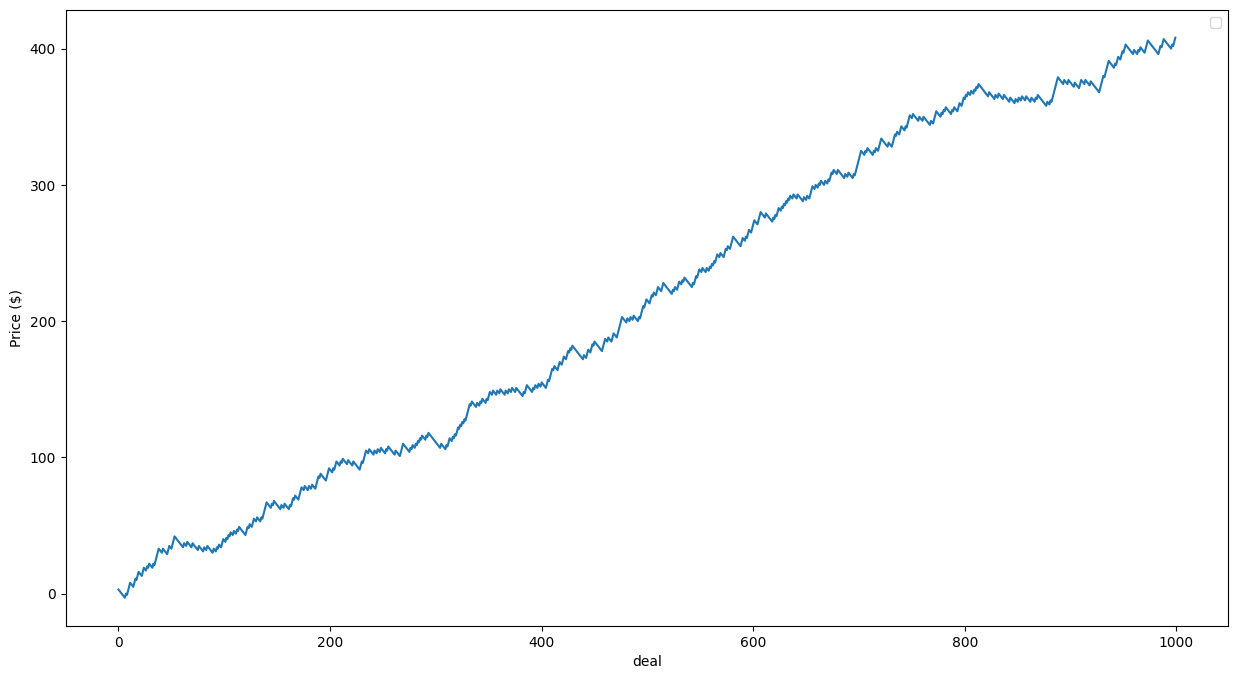

In [ ]:
# check

import random
randomlist = []
for i in range(0,1000):
  n = random.randint(1,97)
  randomlist.append(n)
print(len(randomlist), randomlist)

#income curve
curve = []
q=0
for i in range(len(randomlist)):
  #print(i)
  if randomlist[i]%3 == 0:
    q+=3
    curve.append(q)
  else: 
    q-= 1
    curve.append(q)
print(len(curve), curve)
#plot
plt.figure(figsize=(15, 8))
plt.plot(curve)
plt.xlabel('deal')
plt.ylabel('Price ($)')
#plt.title(f'Local Maxima and Minima for {ticker}')
plt.legend()
plt.show()

In [16]:
# simple trader
data['long_position'] = None
data['long_stop_loss'] = None
data['long_take_profit'] = None

data['short_position'] = None
data['short_stop_loss'] = None
data['short_take_profit'] = None

long_position_list = []
long_stop_loss_list = []
long_take_profit_list = []

short_position_list = []
short_stop_loss_list = []
short_take_profit_list = []

for i in range(len(data['high'])):
  #check the trend
  if (data['high'][i] > data['high'][i-1]) & (data['low'][i] > data['low'][i-1]) & (data['close'][i] > data['close'][i-1]):
    print(f'BUY {i}', data['close'][i-1])

    #open long position
    long_position = data['close'][i-1]
    data['long_position'][i] = long_position
    long_position_list.append(long_position)
    
    #place SL
    stop_loss = data['low'][i-1] - 10
    data['long_stop_loss'][i] = stop_loss
    long_stop_loss_list.append(stop_loss)

    #place TP
    take_profit = long_position + (long_position - stop_loss) * 3
    data['long_take_profit'][i] = take_profit
    long_take_profit_list.append(take_profit)

  if (data['high'][i] < data['high'][i-1]) & (data['low'][i] < data['low'][i-1]) & (data['close'][i] < data['close'][i-1]):
    print(f'SELL {i}', data['close'][i-1])

    short_position = data['close'][i-1]
    data['short_position'][i] = short_position
    short_position_list.append(short_position)
    
    #place SL
    short_stop_loss = data['high'][i-1] + 10
    data['short_stop_loss'][i] = short_stop_loss
    short_stop_loss_list.append(short_stop_loss)

    #place TP
    short_take_profit = short_position - (short_stop_loss - short_position) * 3
    data['short_take_profit'][i] = short_take_profit
    short_take_profit_list.append(short_take_profit)

data.head(5)

SELL 0 1870.75
SELL 1 1425.4
SELL 2 1410.75
BUY 3 1384.2
BUY 4 1416.75
BUY 6 1429.4
SELL 7 1469.1
BUY 10 1438.35
BUY 11 1460.15
SELL 15 1473.35
BUY 16 1468.35
BUY 17 1525.7
BUY 18 1590.0
SELL 20 1613.9
BUY 21 1583.95
BUY 24 1679.05
BUY 27 1689.9
SELL 29 1725.35
SELL 32 1711.85
SELL 33 1686.15
BUY 35 1652.15
SELL 36 1654.35
BUY 37 1650.05
BUY 38 1659.4
BUY 40 1665.35
BUY 42 1676.65
BUY 43 1712.45
BUY 44 1720.85
SELL 45 1765.6
BUY 47 1747.2
BUY 48 1793.8
SELL 50 1818.8
BUY 56 1779.05
BUY 57 1790.0
BUY 58 1798.95
SELL 59 1825.05
SELL 60 1784.0
SELL 63 1783.6
SELL 64 1765.8
SELL 65 1758.5
SELL 67 1749.95
BUY 68 1735.15
BUY 69 1765.8
SELL 74 1795.8
BUY 75 1789.35
SELL 76 1809.65
BUY 78 1737.0
BUY 79 1740.45
BUY 80 1754.95
SELL 86 1816.65
SELL 88 1769.0
SELL 91 1757.5
SELL 92 1748.85
BUY 93 1746.25
SELL 94 1756.0
BUY 96 1744.0
BUY 98 1753.75
BUY 101 1767.05
SELL 103 1765.8
BUY 104 1753.75
SELL 105 1765.85
BUY 109 1711.8
BUY 115 1778.45
BUY 116 1804.5
SELL 117 1811.05
SELL 119 1809.6
SELL 123

<ipython-input-16-050c799599c5>:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-16-050c799599c5>:47: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-16-050c799599c5>:52: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-16-050c799599c5>:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/

1828.15
BUY 132 1822.4
SELL 133 1826.75
SELL 135 1824.3
SELL 136 1820.35
BUY 137 1814.55
SELL 138 1820.5
BUY 139 1817.55
SELL 141 1816.55
SELL 142 1797.9
SELL 144 1793.8
BUY 145 1778.5
BUY 146 1794.3
BUY 148 1795.95
SELL 149 1817.95
BUY 151 1807.3
BUY 152 1811.4
BUY 155 1869.2
BUY 156 1870.9
SELL 162 1907.6
SELL 163 1899.05
SELL 164 1878.45
BUY 168 1872.0
SELL 169 1877.5
BUY 173 1854.8
BUY 175 1868.6
SELL 177 1868.0
SELL 178 1867.65
SELL 179 1854.3
BUY 180 1848.55
SELL 181 1852.0
BUY 184 1837.8
BUY 185 1856.85
SELL 186 1858.7
BUY 187 1858.0
BUY 190 1861.8
BUY 191 1889.55
BUY 192 1910.45
SELL 195 1916.05
SELL 196 1914.2
SELL 197 1894.35


,bol_lower,bol_upper,moving_average,symbol,interval,open_time,open,high,low,close,volume,turnover,local_max,local_min,long_position,long_stop_loss,long_take_profit,short_position,short_stop_loss,short_take_profit
2023-03-10 00:00:00,NaN,NaN,NaN,ETHUSD,240.0,1.678406e+09,1436.60,1436.60,1408.60,1425.40,41986513.0,29518.245585,NaN,NaN,None,None,None,1870.75,1886.4,1823.8
2023-03-10 04:00:00,NaN,NaN,NaN,ETHUSD,240.0,1.678421e+09,1425.40,1425.60,1389.35,1410.75,64666761.0,45930.183768,NaN,NaN,None,None,None,1425.4,1446.6,1361.8
2023-03-10 08:00:00,NaN,NaN,NaN,ETHUSD,240.0,1.678435e+09,1410.75,1411.85,1367.15,1384.20,69742314.0,50357.105897,NaN,1367.15,None,None,None,1410.75,1435.6,1336.2
2023-03-10 12:00:00,NaN,NaN,NaN,ETHUSD,240.0,1.678450e+09,1384.20,1433.75,1379.80,1416.75,139275786.0,99195.649456,NaN,NaN,1384.2,1357.15,1465.35,None,None,None
2023-03-10 16:00:00,NaN,NaN,NaN,ETHUSD,240.0,1.678464e+09,1416.75,1438.50,1400.05,1423.05,55178392.0,38973.772304,1438.5,NaN,1416.75,1369.8,1557.6,None,None,None


In [21]:

#графики
#plotly
fig = go.Figure(data=[go.Candlestick(x=data.index,
                open=data['open'],
                high=data['high'],
                low=data['low'],
                close=data['close'])])

# Plot the three lines of the Bollinger Bands indicator
for parameter in ['moving_average', 'bol_lower', 'bol_upper']:
    fig.add_trace(go.Scatter(
        x = data.index,
        y = data[parameter],
        showlegend = False,
        line_color = 'gray',
        mode='lines',
        line={'dash': 'dash'},
        marker_line_width=2, 
        marker_size=10,
        opacity = 0.8))

# # Plot the three lines of the Bollinger Bands indicator
# fig.add_trace(go.Scatter(x = data.index,
#                          y = data['local_max'],
#                          showlegend = True,
#                          line_color = 'orange',
#                          mode='markers',
#                          line={'dash': 'dash'},
#                          marker_line_width=2, 
#                          marker_size=5,
#                          opacity = 0.8))

# # Plot the three lines of the Bollinger Bands indicator
# fig.add_trace(go.Scatter(x = data.index,
#                          y = data['local_min'],
#                          showlegend = True,
#                          line_color = 'skyblue',
#                          mode='markers',
#                          line={'dash': 'dash'},
#                          marker_line_width=2, 
#                          marker_size=5,
#                          opacity = 0.8))

# Plot the three lines of the Bollinger Bands indicator
fig.add_trace(go.Scatter(x = data.index,
                         y = data['long_position'],
                         showlegend = True,
                         line_color = 'skyblue',
                         mode='markers',
                         line={'dash': 'dash'},
                         name='BUY signal',
                         marker_line_width=2, 
                         marker_size=5,
                         opacity = 0.8))

# Plot the three lines of the Bollinger Bands indicator
# fig.add_trace(go.Scatter(x = data.index,
#                          y = data['long_stop_loss'],
#                          showlegend = True,
#                          line_color = 'red',
#                          mode='markers',
#                          line={'dash': 'dash'},
#                          marker_line_width=2, 
#                          marker_size=5,
#                          opacity = 0.8))

# Plot the three lines of the Bollinger Bands indicator
# fig.add_trace(go.Scatter(x = data.index,
#                          y = data['long_take_profit'],
#                          showlegend = True,
#                          line_color = 'green',
#                          mode='markers',
#                          line={'dash': 'dash'},
#                          marker_line_width=2, 
#                          marker_size=5,
#                          opacity = 0.8))

# Plot the three lines of the Bollinger Bands indicator
fig.add_trace(go.Scatter(x = data.index,
                         y = data['short_position'],
                         showlegend = True,
                         line_color = 'orange',
                         mode='markers',
                         line={'dash': 'dash'},
                         name = 'SELL signal',
                         marker_line_width=2, 
                         marker_size=5,
                         opacity = 0.8))

# Plot the three lines of the Bollinger Bands indicator
# fig.add_trace(go.Scatter(x = data.index,
#                          y = data['short_stop_loss'],
#                          showlegend = True,
#                          line_color = 'red',
#                          mode='markers',
#                          line={'dash': 'dash'},
#                          marker_line_width=2, 
#                          marker_size=5,
#                          opacity = 0.8))

# # Plot the three lines of the Bollinger Bands indicator
# fig.add_trace(go.Scatter(x = data.index,
#                          y = data['short_take_profit'],
#                          showlegend = True,
#                          line_color = 'green',
#                          mode='markers',
#                          line={'dash': 'dash'},
#                          marker_line_width=2, 
#                          marker_size=5,
#                          opacity = 0.8))


# Plot the days_week vertical lines
for indexes, day in days_week.items():
    if day == 1:
        fig.add_vline(x=indexes, 
        line_width=1, 
        line_dash="dash", 
        line_color="green")


fig.update_layout(
    autosize=False,
    width= 1500,
    height=1000,)
fig.show()

In [ ]:
from datetime import datetime, timedelta

def get_next_monday():
    today = datetime.today()
    days_until_monday = (7 - today.weekday()) % 7
    next_monday = today + timedelta(days=days_until_monday)
    return next_monday.replace(hour=0, minute=0)

print(get_next_monday())

2023-04-24 00:00:10.177351
